In [11]:
# activate pyalcs-experiments

# logging 
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)


In [12]:
# environment setup
import gym
# noinspection PyUnresolvedReferences
import gym_corridor


# maze = gym.make('corridor-100-v0')
maze = gym.make('corridor-40-v0')
# maze = gym.make('corridor-20-v0')

maze.reset()
maze.render()

[.....................................X.$]


INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 200, 'reward': [8.863654788418667e-40, 1.0062240605338938e-39], 'population': 58, 'knowledge': 0.7125, 'numerosity': 140}
INFO:lcs.agents.Agent:{'trial': 100, 'steps_in_trial': 200, 'reward': [40.75893628699337, 21.55162427687288], 'population': 73, 'knowledge': 0.8625, 'numerosity': 201}
INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 93, 'reward': [8.847657213520396, 109.21876413546192], 'population': 73, 'knowledge': 0.8625, 'numerosity': 200}
INFO:lcs.agents.Agent:{'trial': 300, 'steps_in_trial': 4, 'reward': [13.511487714328151, 188.08704069155374], 'population': 72, 'knowledge': 0.85, 'numerosity': 200}
INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 200, 'reward': [45.31261493477117, 52.64723177213358], 'population': 72, 'knowledge': 0.85, 'numerosity': 200}
INFO:lcs.agents.Agent:{'trial': 500, 'steps_in_trial': 200, 'reward': [22.188368279211844, 7.818618866316086], 'population': 71, 'knowledge': 0.8375, 'numero

Cond:# - Act:0 - Num:8 [fit: 0.000, exp: 8644.00, pred: 116.729]
Cond:1 - Act:1 - Num:6 [fit: 0.000, exp: 814.00, pred: 167.945]
Cond:2 - Act:1 - Num:6 [fit: 0.000, exp: 563.00, pred: 184.253]
Cond:3 - Act:0 - Num:2 [fit: 0.000, exp: 517.00, pred: 129.685]
Cond:3 - Act:1 - Num:5 [fit: 0.000, exp: 567.00, pred: 181.399]
Cond:4 - Act:0 - Num:1 [fit: 0.000, exp: 493.00, pred: 119.064]
Cond:4 - Act:1 - Num:3 [fit: 0.000, exp: 589.00, pred: 190.995]
Cond:5 - Act:0 - Num:1 [fit: 0.000, exp: 497.00, pred: 130.542]
Cond:5 - Act:1 - Num:4 [fit: 0.000, exp: 589.00, pred: 151.400]
Cond:7 - Act:0 - Num:3 [fit: 0.000, exp: 540.00, pred: 121.305]
Cond:# - Act:1 - Num:5 [fit: 0.000, exp: 6307.00, pred: 116.803]
Cond:8 - Act:1 - Num:4 [fit: 0.000, exp: 966.00, pred: 142.842]
Cond:9 - Act:1 - Num:2 [fit: 0.000, exp: 1449.00, pred: 117.761]
Cond:10 - Act:0 - Num:3 [fit: 0.538, exp: 1238.00, pred: 111.289]
Cond:#0 - Act:1 - Num:2 [fit: 0.194, exp: 4890.00, pred: 115.738]
Cond:11 - Act:0 - Num:2 [fit: 0.1

(0.0, 250.0)

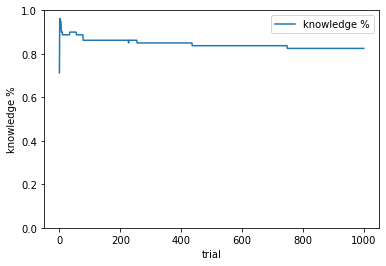

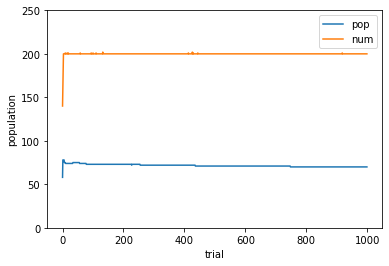

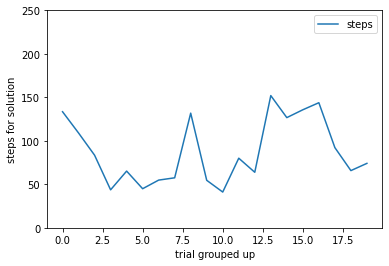

In [13]:
from lcs.agents.xcs import XCS, Configuration

# TODO: Move to utils
def xcs_corridor_knowledge(xcs: XCS, environment):
    nr_correct = 0
    position = 0
    while environment.observation_space.contains(position):
        if any([True for cl in xcs.population if cl.does_match(str(position)) and
                                                 cl.action == 1 and 
                                                 cl.wildcard_number == 0 ]):
            nr_correct += 1
        if any([True for cl in xcs.population if cl.does_match(str(position)) and
                                                 cl.action == 0 and 
                                                 cl.wildcard_number == 0 ]):
            nr_correct += 1
        position += 1
    return nr_correct / (position*2)


def xcs_corridor_metrics(xcs: XCS, environment):
    return {
        'population': len(xcs.population),
        'knowledge': xcs_corridor_knowledge(xcs, environment),
        'numerosity': sum(cl.numerosity for cl in xcs.population)
    }


cfg = Configuration(number_of_actions=2,
                    metrics_trial_frequency=1,
                    covering_wildcard_chance=1,
                    user_metrics_collector_fcn=xcs_corridor_metrics)

agent = XCS(cfg)
explore_population, explore_metrics = agent.explore(maze, 1000, False)

for cl in explore_population:
    print(str(cl))
print("Following is prediction Array. In case of Corridor better the last value the better")
print(explore_population.prediction_array)

import pandas as pd
import numpy as np

# TODO Merge explore and exploit

df = pd.DataFrame(metric["knowledge"] for metric in explore_metrics)
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("knowledge %")
ax.legend(["knowledge %"])
ax.set_ylim(ymin=0, ymax=1)


df = pd.DataFrame(zip([metric["population"] for metric in explore_metrics], [metric["numerosity"] for metric in explore_metrics]))
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["pop", "num"])
ax.set_ylim(ymin=0, ymax=250)


xf = [metric["steps_in_trial"] for metric in explore_metrics]
temp_df = np.array_split(xf, 20)
for i in range(len(temp_df)):
    temp_df[i] = np.mean(temp_df[i]) 
df = pd.DataFrame(temp_df)
ax = df.plot()
ax.set_xlabel("trial grouped up")
ax.set_ylabel("steps for solution")
ax.legend(["steps"])
ax.set_ylim(ymin=0, ymax=250)